In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from logpar.clustering import clustering  # The logpar package
import scipy.cluster.hierarchy as sci_hie

### Features

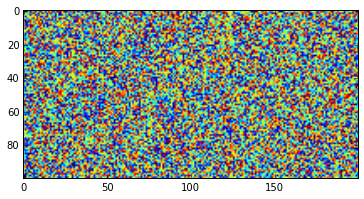

In [3]:
# Create features' matrix (100 features)
N, M = 100, 200
features = numpy.random.random((N, M))
imshow(features)

### Simple Ward's Clustering 

Let's make a basic clustering, without imposing any constraints

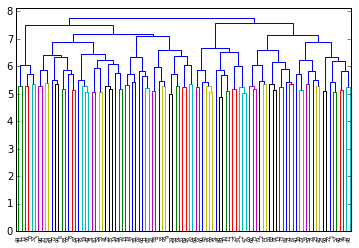

In [4]:
# Compute clustering using ward's technique
dendro = clustering(features, method='ward')

# Display dendrogram using scipy auxiliar function
_ = sci_hie.dendrogram(dendro)

### Simple Constrained Ward's Clustering 

Now, lets asume our features lie in some space, and some of them are neighbors. Lets create an matrix which reflects the adyacency between clusters.

(<matplotlib.text.Text at 0x7fa09d92cad0>,
 <matplotlib.image.AxesImage at 0x7fa09c7058d0>)

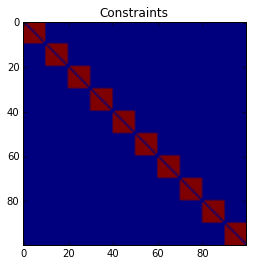

In [5]:
# Create a matrix (100x100) denoting adyacency between features
patches = numpy.zeros((N, N))
step = 10
for i in xrange(0, N, step):
    patches[i:i+step, i:i+step] = numpy.ones((step, step)) - numpy.eye(step)

# The features are spatially organized as patches
title('Constraints'), imshow(patches)

Once more, we are interested in cluster the features, but this time we want to include neighboring information. In particular, we are interested in grouping only neighboring features, until a certain size is reached. Then the clustering process starts again, clustering the obtained clusters without constraints. This is, we first create some sort of "super clusters" (similar to the concept of super voxels), which are then clustered without constraints.

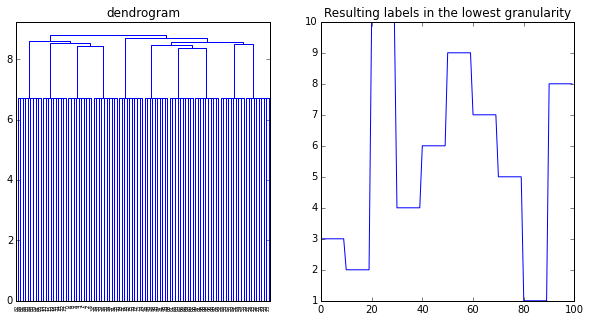

In [6]:
# Ward's cluster imposing neighboring constraints and a minimum size in the resulting clusters
dendro = clustering(features, method='ward', constraints=patches, min_size=step)

# Plot dendrogram and resulting clusters
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)
title('dendrogram')
_ = sci_hie.dendrogram(dendro)

ax = fig.add_subplot(1, 2, 2)
title('Resulting labels in the lowest granularity')
plot(sci_hie.fcluster(dendro, dendro[:, 2].min(), criterion='distance'))

Notice how in the minimum granularity we have the same label asigned to contiguous features

Our function also allows to use only one of both constraint parameters. This means that it's possible to:
1. Cluster the features imposing only a minimum size in the clusters, in order to impose a minimum granularity on the resulting parcellations.
2. Cluster the features imposing only a constraint in the neighboring, in order to only merge features which are neighbors.

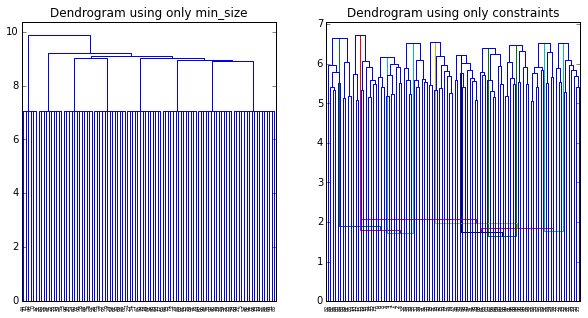

In [7]:
dendro_only_min_size = clustering(features, method='ward', min_size=step)
dendro_only_constraints = clustering(features, method='ward', constraints=patches)

# Plot both cases
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
title('Dendrogram using only min_size')
_ = sci_hie.dendrogram(dendro_only_min_size)
ax = fig.add_subplot(1, 2, 2)
title('Dendrogram using only constraints')
_ = sci_hie.dendrogram(dendro_only_constraints)

Please notice how using only min_size imposes a minimum granularity.

Also, notice how, in this particular case, using only constraints creates inversions in the dendrogram. This is because our constraint matrix is composed of disjoint patches. After all the features in a patch were merged, the algorithm had no other choise but to merge the disjoint patches between them. However, these patches are not taken as "super clusters", since a minimum granularity is not imposed. Therefore, when the algorithm continues, the distance between patches is smaller than the distance between features inside of a patch.